In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import scale

In [71]:
houses = pd.read_csv('house_prices.csv')

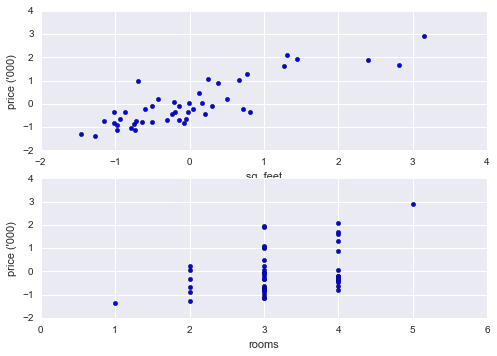

In [72]:
plt.figure(1)
plt.subplot(211)
plt.xlabel('sq. feet')
plt.ylabel('price (\'000)')
plt.scatter(scale(houses['sqft']), scale(houses['price']))
plt.subplot(212)
plt.xlabel('rooms')
plt.ylabel('price (\'000)')
plt.scatter(houses['rooms'], scale(houses['price']))

In [73]:
X = scale(houses[['sqft', 'rooms']].as_matrix())
X = np.column_stack([np.ones([X.shape[0]]), X])
y = scale(houses[['price']].as_matrix().ravel())

In [74]:
# Hypothesis function
def h(theta, X):
    return np.matmul(X, theta)

# Cost function
def J(theta, X, y):
    d = h(theta, X) - y
    return 0.5 * np.dot(d, d.T)

In [75]:
# One step of gradient descent
def descend(theta, X, y, alpha=0.01):
    error = h(theta, X) - y
    t = theta - alpha * np.matmul(X.T, error)
    return t, np.dot(error, error.T)

In [76]:
theta = np.zeros([X.shape[1]])

theta, cost = descend(theta, X, y)
for i in range(10000):
    cost_ = cost
    theta, cost = descend(theta, X, y)
    if cost_ - cost < 0.0000001:
        break
        
    if i % 10 == 0:
        print("epoch: {0}, cost: {1}".format(i, cost))

print("epoch: {0}, cost: {1}".format(i, cost))
print("theta: {0}".format(theta))

epoch: 0, cost: 20.079774540230776
epoch: 10, cost: 12.607192671309605
epoch: 20, cost: 12.552124442287859
epoch: 30, cost: 12.551589402068807
epoch: 38, cost: 12.551584281495717
theta: [ -8.16013923e-17   8.84721717e-01  -5.31345488e-02]


In [77]:
from sklearn.linear_model import LinearRegression

l = LinearRegression(fit_intercept=False)
l.fit(X, y)
l.coef_

array([ -8.09713360e-17,   8.84765988e-01,  -5.31788197e-02])